# Model Performance Measures, ML Pipeline and Hyperparameter Tuning

## Can you correctly identify glass type?

## Context:
    
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 
values)

# Content

Attribute Information:

Id number: 1 to 214 

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type of glass: (class attribute) 
    -- 1 building_windows_float_processed 
    -- 2 building_windows_non_float_processed 
    -- 3 vehicle_windows_float_processed 
    -- 4 vehicle_windows_non_float_processed (none in this database) 
    -- 5 containers 
    -- 6 tableware 
    -- 7 headlamps

## Source:
https://archive.ics.uci.edu/ml/datasets/Glass+Identification

# 1.  Import necessary libraries and load the data

In [3]:
import pandas as pd 
df = pd.read_csv('glass.data', names=["ri","na","mg","ai","si","k","ca","ba","fe"])
df.head()

,,ri,na,mg,ai,si,k,ca,ba,fe
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 2. Split the data into dependent and independent variables. Also see how the looks like

Hint: you can make use of nay method(iloc or drop method)

In [23]:
X = df.iloc[:, :-1] #.values 
X.info()
print(X.describe())
print("-----------------------")

y = df.iloc[:, -1:]
y.info()
print(y.describe())
print("-----------------------")

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 214 entries, (1, 1.52101) to (214, 1.51711)
Data columns (total 8 columns):
ri    214 non-null float64
na    214 non-null float64
mg    214 non-null float64
ai    214 non-null float64
si    214 non-null float64
k     214 non-null float64
ca    214 non-null float64
ba    214 non-null float64
dtypes: float64(8)
memory usage: 17.3 KB
               ri          na          mg          ai          si           k  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean    13.407850    2.684533    1.444907   72.650935    0.497056    8.956963   
std      0.816604    1.442408    0.499270    0.774546    0.652192    1.423153   
min     10.730000    0.000000    0.290000   69.810000    0.000000    5.430000   
25%     12.907500    2.115000    1.190000   72.280000    0.122500    8.240000   
50%     13.300000    3.480000    1.360000   72.790000    0.555000    8.600000   
75%     13.825000    3.600000    1.630000   73.087

# 3. Convert Target variable into numerical

In [24]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1:].values 

# 4. Split the dataset into train set test set also the validation 
Always a good practice to split the dataset into 3 sets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)

y_train = y_train.ravel()
y_test = y_test.ravel()

# 5. Build the pipeline
Steps:
Instantiate the pipeline, as first defining standard scaler and on the scaled data run the PCA and then feed it to the logistic regression(or any other algo)

In [31]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 

pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(random_state=1))]) 
pipe_lr.fit(X_train, y_train) 
print('Train Accuracy: %.3f' % pipe_lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Train Accuracy: 0.604
Test Accuracy: 0.523


# 6.Follow the above steps and check if you can tweak the logistic regression parameters above and make use of Grid search(can use any algorithm)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())]) 

param_grid = {'pca__n_components':[5,8],'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel':['rbf','poly']} 

grid = GridSearchCV( pipe_svc , param_grid = param_grid, cv = 5) 

grid.fit(X_train, y_train) 

print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))

 Best cross-validation accuracy: 0.71
 Best parameters:  {'pca__n_components': 5, 'svc__C': 100, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
 Test set accuracy: 0.68


# 7. Optimize the model parameters(can make use of any algorithm)

Make use of Grid search for hyper parameter

Steps:
Split the dataset into train and test set

Make use of any algorithm , from the list of hyper parameters you get apply param grid 

Once hyper parameter grid is defined, import grid search CV and fit x_train and y_train

Find the best params and mean test score



 Best cross-validation accuracy: 0.70
 Best parameters:  {'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
 Test set accuracy: 0.68


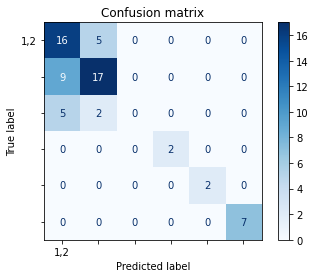

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

def build_model(model_type, model_name, param_grid):
    pipe_svc = Pipeline([('scl', StandardScaler()), (model_name, model_type)]) 
    grid = GridSearchCV(pipe_svc , param_grid = param_grid, cv = 5) 
    grid_fit = grid.fit(X_train, y_train) 
    y_test_pred = grid.predict(X_test)
    
    print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
    print(" Best parameters: ", grid.best_params_) 
    print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))
    
    confusion_matrix(y_test, y_test_pred)
    disp = plot_confusion_matrix(grid_fit, X_test, y_test,
                                 display_labels=["1,2"],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    disp.ax_.set_title("Confusion matrix")
        
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel':['rbf','poly']}    
build_model(SVC(), 'svc', param_grid)

 Best cross-validation accuracy: 0.72
 Best parameters:  {'rf__bootstrap': True, 'rf__criterion': 'gini', 'rf__max_depth': 4}
 Test set accuracy: 0.65


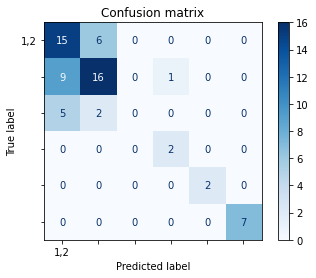

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'rf__max_depth': [3, 4], 'rf__criterion': ["gini", "entropy"], 'rf__bootstrap':[True,False]} 
build_model(RandomForestClassifier(), 'rf', param_grid)

In [34]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier?